In [60]:
import __init__
import os 
import matplotlib as mplt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import utilities
from __init__ import DATA_PATH, PACKAGE_PATH
from descriptor import rdkitDescriptors
%matplotlib inline

In [61]:
sns.set(style='white', font_scale=3)

In [16]:
df = pd.read_csv(os.path.join(DATA_PATH,'BOD_RDKit_Descriptors_1063.csv'))
df['cleaned_bod'] = utilities.clean_out_of_bound(df['value (% BOD)'])

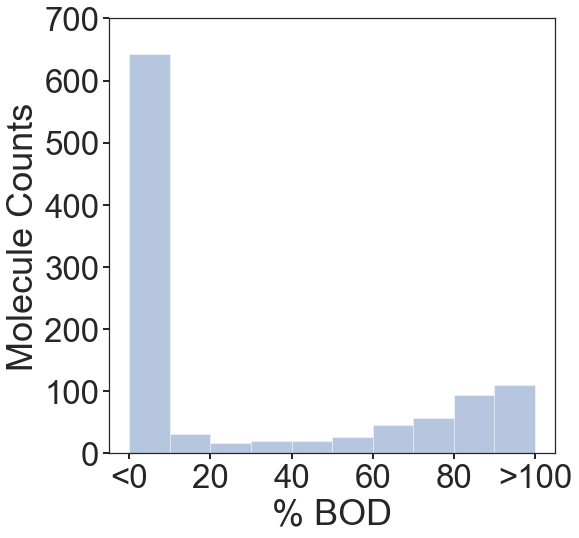

In [41]:
fig, ax=plt.subplots(figsize=(8,8))
sns.distplot(df['cleaned_bod'],bins=10,kde=False,hist=True, ax=ax)
ax.set_xticks([0,20,40,60,80,100])
ax.set_xticklabels(['<0','20','40','60','80','>100'])
ax.set_yticks([0,100,200,300,400,500,600,700])
ax.tick_params(axis='both',bottom=True, left=True, width=2)
ax.set_xlabel('% BOD')
ax.set_ylabel('Molecule Counts')
fig.savefig('mol_bod_hist.pdf',bbox_inches='tight')

In [29]:
df['bi_class_partition'] = utilities.divide_classes(df['cleaned_bod'], [60])
true_label_biclass = df['bi_class_partition'].values

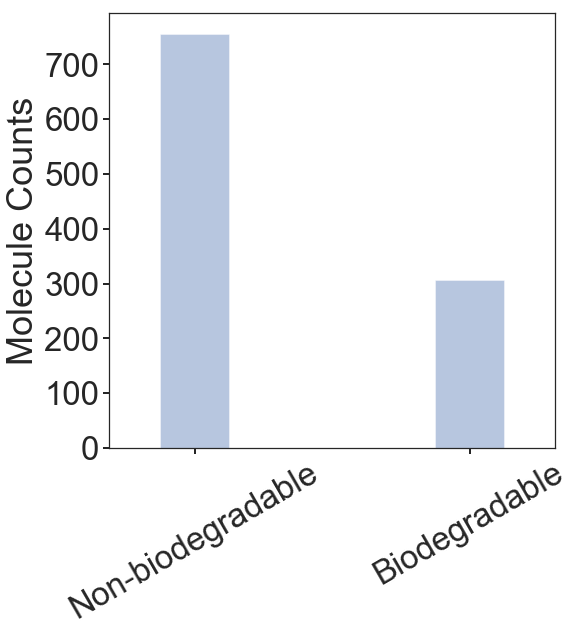

In [59]:
fig, ax=plt.subplots(figsize=(8,8))
sns.distplot(df['bi_class_partition'],bins=5,kde=False,hist=True, ax=ax)
ax.set_xticks([0.1,0.9])
ax.set_xticklabels(['Non-biodegradable','Biodegradable'], rotation=30)
ax.set_yticks([0,100,200,300,400,500,600,700])
ax.tick_params(axis='both',bottom=True, left=True, width=2)
ax.set_xlim([-0.15,1.15])
ax.set_xlabel('')
ax.set_ylabel('Molecule Counts')
fig.savefig('mol_bod_2_cluster.pdf',bbox_inches='tight')

In [44]:
df['tri_class_partition'] = utilities.divide_classes(df['cleaned_bod'], [20,80])
true_label_triclass = df['tri_class_partition'].values

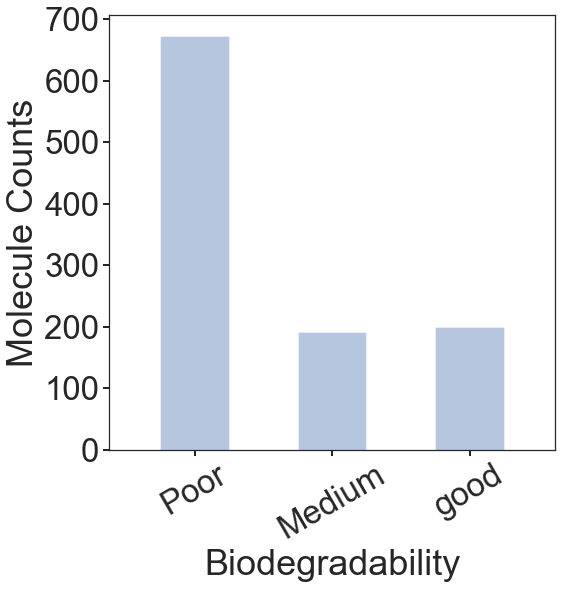

In [62]:
fig, ax=plt.subplots(figsize=(8,8))
sns.distplot(df['tri_class_partition'],bins=5,kde=False,hist=True, ax=ax)
ax.set_xticks([0.2, 1, 1.8])
ax.set_xticklabels(['Poor','Medium','good'], rotation=30)
ax.set_yticks([0,100,200,300,400,500,600,700])
ax.tick_params(axis='both',bottom=True, left=True, width=2)
ax.set_xlim([-0.3,2.3])
ax.set_xlabel('Biodegradability')
ax.set_ylabel('Molecule Counts')
fig.savefig('mol_bod_3_cluster.pdf',bbox_inches='tight')